In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
import string

### Puzzle as published
https://www.janestreet.com/puzzles/game-night-index/

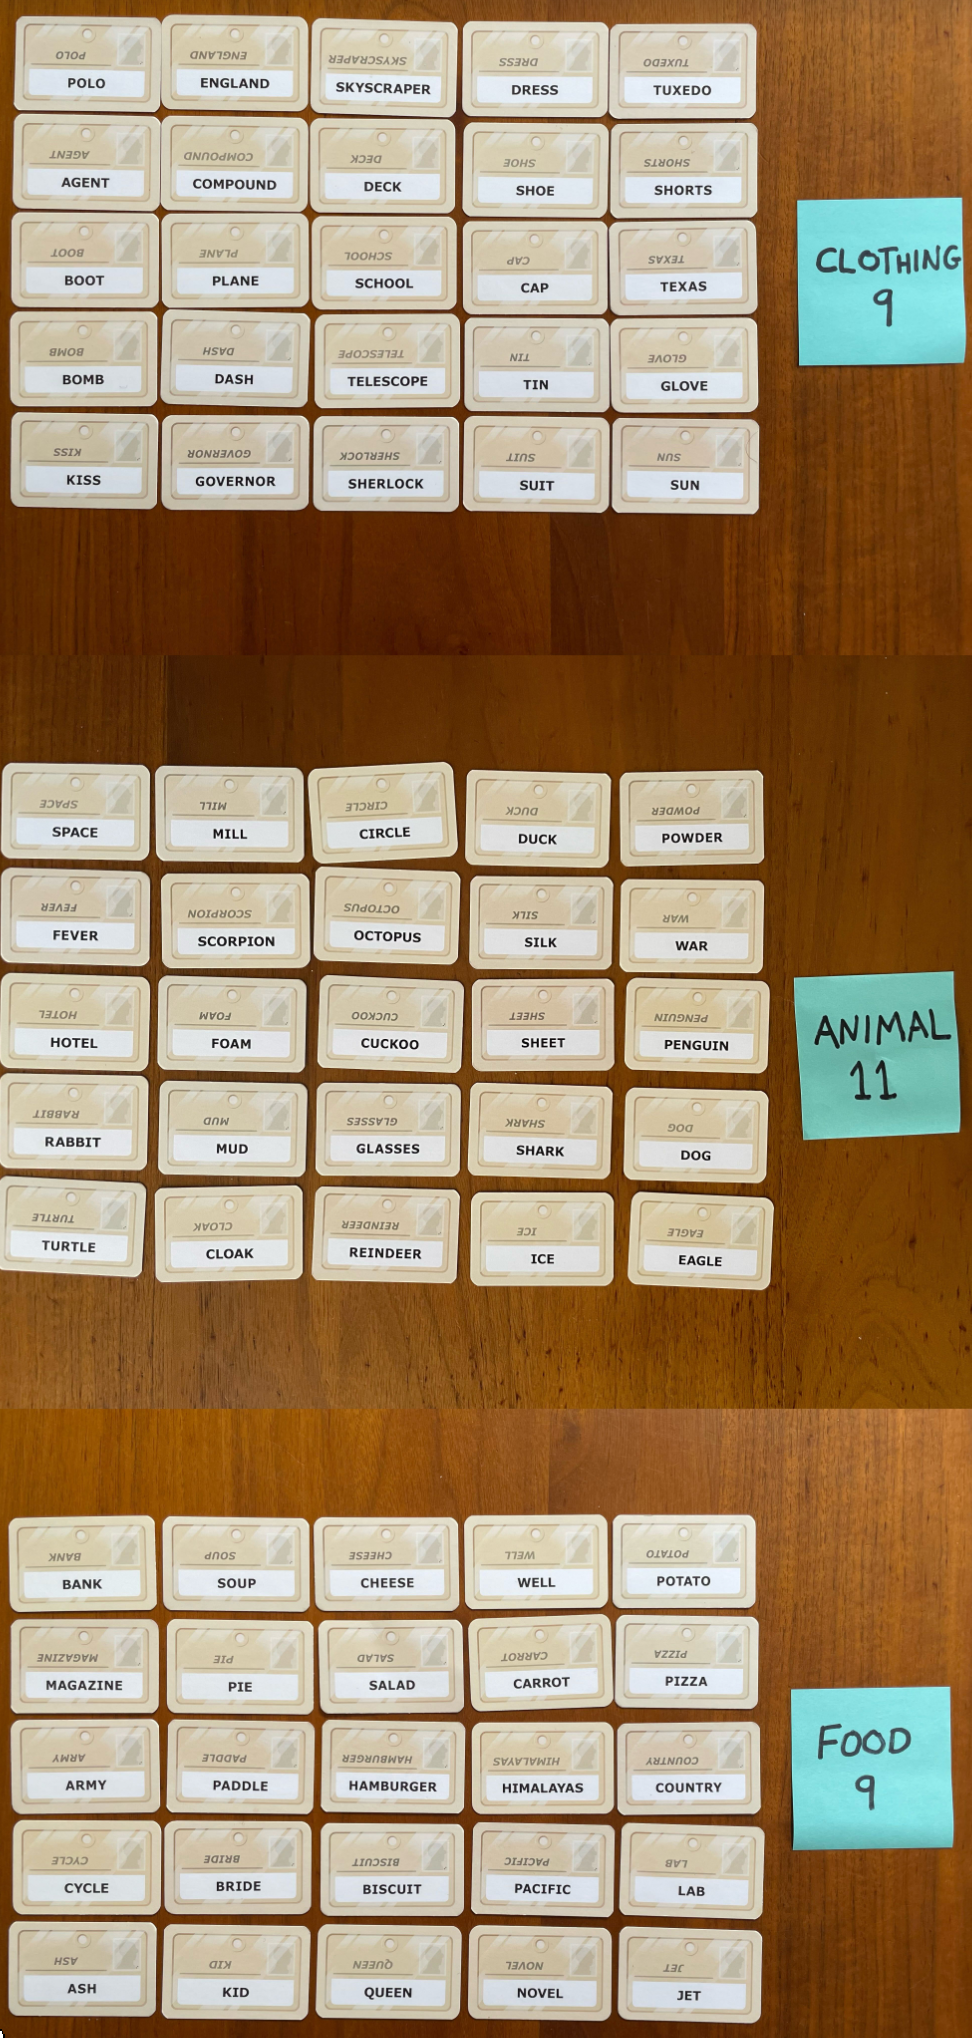

### Game Night!

May 2023 : Puzzle
Show Solution
The three best first plays from our recurring
Codenames
game
night are pictured above: one matched eleven words and the other two
matched nine each! We looked at the boards over and over again and
decided that when the clues encode the target words in such a binary
fashion you can get impressive results.
[The answer to this puzzle is a single word.]
2023-05-02 update:

In [2]:
url='https://www.janestreet.com/puzzles/game-night-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published\n'+url))
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Image('https://www.janestreet.com/puzzles/game-night.png',width=300))
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[9:16]))))

In [3]:
grid1 =np.array([[1, 0, 0, 1, 1],
                 [0, 0, 0, 1, 1],
                 [1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 1],
                 [0, 0, 0, 1, 0]])

grid2 =np.array([[0, 0, 0, 1, 0],
                 [0, 1, 1, 0, 0],
                 [0, 0, 1, 0, 1],
                 [1, 0, 0, 1, 1],
                 [1, 0, 1, 0, 1]])

grid3 =np.array([[0, 1, 1, 0, 1],
                 [0, 1, 1, 1, 1],
                 [0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0]])

print(np.sum(grid1))
print(np.sum(grid2))
print(np.sum(grid3))

words1 =np.array([['POLO','ENGLAND','SKYSCRAPER','DRESS','TUXEDO'],
                  ['AGENT','COMPOUND','DECK','SHOE','SHORTS'],
                  ['BOOT','PLANE','SCHOOL','CAP','TEXAS'],
                  ['BOMB','DASH','TELESCOPE','TIN','GLOVE'],
                  ['KISS','GOVERNOR','SHERLOCK','SUIT','SUN']])

words2 =np.array([['SPACE','MILL','CIRCLE','DUCK','POWDER'],
                  ['FEVER','SCORPION','OCTOPUS','SILK','WAR'],
                  ['HOTEL','FOAM','CUCKOO','SHEET','PENGUIN'], #['HOTEL','cloud','elephant','SHEET','PENGUIN'],
                  ['RABBIT','MUD','GLASSES','SHARK','DOG'],
                  ['TURTLE','CLOAK','REINDEER','ICE','EAGLE']])

words3 =np.array([['BANK','SOUP','CHEESE','WELL','POTATO'],
                  ['MAGAZINE','PIE','SALAD','CARROT','PIZZA'],
                  ['ARMY','PADDLE','HAMBURGER','HIMALAYAS','COUNTRY'],
                  ['CYCLE','BRIDE','BISCUIT','PACIFIC','LAB'],
                  ['ASH','KID','QUEEN','NOVEL','JET']])

words = np.block([[words1],[words2],[words3]])
grid  = np.block([[grid1],[grid2],[grid3]])

9
11
9


In [4]:
def trans(words,grid):
    binary = np.array([16,8,4,2,1])
    letters =[" "]+[i for i in string.ascii_uppercase]
    return "".join([letters[i] for i in list(grid@binary)])

trans(words,grid)

'SCRABBLESUMODD '

In [5]:
@np.vectorize
def score(word):
    points = {
    "a": 1, "c": 3, "b": 3, "e": 1, "d": 2, "g": 2, 
    "f": 4, "i": 1, "h": 4, "k": 5, "j": 8, "m": 3, 
    "l": 1, "o": 1, "n": 1, "q": 10, "p": 3, "s": 1, 
    "r": 1, "u": 1, "t": 1, "w": 4, "v": 4, "y": 4, 
    "x": 8, "z": 10," ":0}
    return np.sum([points[w] for w in word.lower()])

trans(words,score(words)%2 ==1)

'LONGERTHANFIVE '

In [6]:
length = np.vectorize(len)
trans(words,length(words)>5)

'MIDDLELETTEROF '

In [7]:
@np.vectorize
def middle(word):
    return word[len(word)//2]

"".join(middle(words[-1,:]))

'SIEVE'

In [8]:
url='https://www.janestreet.com/puzzles/game-night-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published\n'+url))
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[1:23]))))

### Solution as published
https://www.janestreet.com/puzzles/game-night-solution/

### Game Night!

Intro
Current Puzzle
Archive
Puzzles
Intro
Current Puzzle
Archive
Game Night!
May 2023 : Solution
Show Puzzle
We were presented three Codenames boards with exceptionally
high-scoring plays. A natural first step is to find the correct cards
grouped by each clue, these words are
Clothing 9:
POLO DRESS TUXEDO SHOE SHORTS BOOT CAP GLOVE SUIT
Animal 11:
DUCK SCORPION OCTOPUS CUCKOO PENGUIN RABBIT SHARK DOG TURTLE REINDEER
EAGLE
Food 9:
SOUP CHEESE POTATO PIE SALAD CARROT PIZZA HAMBURGER BISCUIT
Then, using some flavor clues, you may notice that you can convert
each row into a binary number (where a selected word is represented by
1 and an unselected word represented by 0) between 0 and 31, which can
conveniently be converted to a letter with the standard 1=A, 2=B, 3=C
cipher. For example, the first row of
POLO ENGLAND SKYSCRAPER DRESS TUXEDO
has POLO, DRESS, and TUXEDO selected, and ENGLAND and SKYSCRAPER
unselected, so would convert to the binary number 10011, or 19 in
decimal, which converts to ‘S’.
Reading these rows down the puzzle you get SCRABBLESUMODD_ (the final
row gives 00000 which doesn’t convert to a letter). We can read this
as “Scrabble sum odd,” a new property we can use to select and
unselect words on the board (the flavor text also suggests recursively
looking at the board over and over). So we go about the same procedure
but now select words with odd scrabble sum. For example, in the first
row, the scrabble sums are 6, 9, 21, 6, and 14, so the binary digits
we get for which of these are odd are 01100, which is 12 in decimal,
giving an ‘L’.
Reading these rows down the puzzle gives LONGERTHANFIVE_ (again the
final row gives 00000), and we have yet another condition for words
having more than five letters. Recurring yet again, (now the first row
gives 01101=13=’M’), we read off MIDDLELETTEROF_
Now we don’t have an obvious condition, but the final row failing to
match any of the previous clues is starting to stick out. All of the
words in this final row are odd in length, and thus have a well
defined middle letter, which read from left to right
SIEVE
, the
somewhat appropriate answer to the puzzle!